In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib.patches as patches

In [113]:
LO_cd = 7300
LO_ho = 7000
LO_wa = -5843
LO_12 = -6000

ny1 = np.array([ 10,512])
ny2 = np.array([512,1024])
ny  = [ny1,ny2] 

rest_freq = 6668

LOs = [LO_cd,LO_ho,LO_wa]

edge = np.array([6652])

In [114]:
edge-rest_freq

array([-16])

In [115]:
for lo in LOs:
    print([s for s in abs(edge-np.sign(lo)*lo)])

[648]
[348]
[809]


array([-648])

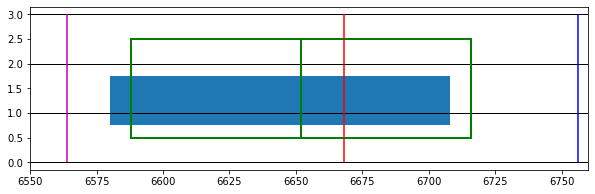

In [117]:
fig, ax = plt.subplots(1,figsize=(10,3))


p = []
for i in range(2):
    for j in range(len(LOs)):
        p.append(patches.Rectangle((min(abs(LOs[j]-ny[i])), j),np.diff(ny[i])[0], 1
                                   ,edgecolor='k',facecolor='none'))
bbc = []
width = 64
up   = -width
down = 0

ud = [down,up]
for j in range(len(edge)):
    for i in range(2):
        bbc.append(patches.Rectangle((edge[j]+ud[i], 0.5),width,2
                            ,edgecolor='g',lw=2
                            ,facecolor='none'))

old = patches.Rectangle((6580,0.75),128,1)        
ax.add_patch(old)

# Add the patch to the Axes
for pat in p:
    ax.add_patch(pat);

for b in bbc:#[2:]:
    ax.add_patch(b)
    
ax.vlines(x=6668,ymin=0,ymax=3,color='r',label='Maser')
ax.vlines(x=6564,ymin=0,ymax=3,color='m',label='')
ax.vlines(x=6756,ymin=0,ymax=3,color='b',label='')

ax.set_xlim(6550,6760)

(edge-LO_cd)
#(edge+LO_12)

In [118]:
(edge[0]-64+np.arange(0,8)*32)-6000

array([588, 620, 652, 684, 716, 748, 780, 812])

In [119]:
edge-LO_cd

array([-648])

In [120]:
LO_wa+edge

array([809])

In [121]:
edge - LO_ho

array([-348])